## Problem Statement
We are going to classify the delays in domestic flights using the dataset from the month of February that is made publicly available by the Bureau of Transportation Statistics, Govt of USA.

We are going to use *logistic regrssion* as the primary classifier but as we go along we'll also use *SVM* and *Neural Networks* based on the accuracy of the predictor!

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("Feb_2020_ontime.csv")

In [49]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,6,MQ,20398,MQ,N269NN,3825,13930,1393007,ORD,...,TUL,1646.0,0.0,1600-1659,1820.0,0.0,0.0,0.0,585.0,NaN
1,1,6,MQ,20398,MQ,N908AE,3829,12478,1247805,JFK,...,BNA,1336.0,0.0,1300-1359,1458.0,0.0,0.0,0.0,765.0,NaN
2,1,6,MQ,20398,MQ,N663AR,3831,11953,1195302,GNV,...,MIA,844.0,0.0,0800-0859,1020.0,1.0,0.0,0.0,294.0,NaN
3,1,6,MQ,20398,MQ,N618AE,3833,11298,1129806,DFW,...,SJT,852.0,0.0,0800-0859,955.0,0.0,0.0,0.0,229.0,NaN
4,1,6,MQ,20398,MQ,N618AE,3833,14842,1484202,SJT,...,DFW,1024.0,0.0,1000-1059,1132.0,0.0,0.0,0.0,229.0,NaN


In [50]:
#Let's go ahead and delete the last column in dataset
df.drop("Unnamed: 21", axis = 1, inplace = True)
#Let's check for the columns name and understand what we can work with 
df.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE'],
      dtype='object')

In [51]:
# let's explore a bit more and understand what some of these columns represent 
df['OP_UNIQUE_CARRIER'].unique()

array(['MQ', 'B6', 'OH', 'AA', 'NK', 'YX', 'F9', 'DL', 'YV', 'EV', 'HA',
       '9E', 'G4', 'UA', 'AS', 'WN', 'OO'], dtype=object)

In [52]:
df['OP_CARRIER_AIRLINE_ID'].unique()

array([20398, 20409, 20397, 19805, 20416, 20452, 20436, 19790, 20378,
       20366, 19690, 20363, 20368, 19977, 19930, 19393, 20304])

In [53]:
df['OP_CARRIER'].unique()

array(['MQ', 'B6', 'OH', 'AA', 'NK', 'YX', 'F9', 'DL', 'YV', 'EV', 'HA',
       '9E', 'G4', 'UA', 'AS', 'WN', 'OO'], dtype=object)

In our case, **OP_UNIQUE_CARRIER, OP_CARRIER and OP_CARRIER_AIRLINE_ID** all kind of means the same thing. Those are codes assinged by the DOT to identify individual carriers. 

For our analysis let's use just **OP_CARRIER** and drop the other two columns.

Also, let's remove the **TAIL_NUM AND OP_CARRIER_FL_NUM** from our dataset. 

In [54]:
df.drop(['OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','TAIL_NUM','OP_CARRIER_FL_NUM','DIVERTED'], axis = 1, inplace = True)

In [55]:
#Checking for nulll values before moving forward 
df.isna().sum()

DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_CARRIER                  0
ORIGIN_AIRPORT_ID           0
ORIGIN_AIRPORT_SEQ_ID       0
ORIGIN                      0
DEST_AIRPORT_ID             0
DEST_AIRPORT_SEQ_ID         0
DEST                        0
DEP_TIME                 4938
DEP_DEL15                4951
DEP_TIME_BLK                0
ARR_TIME                 5287
ARR_DEL15                6192
CANCELLED                   0
DISTANCE                    0
dtype: int64

In [56]:
# Let's go ahead and drop all the null values and store it in a new dataframe for ease of computation
df1 = df.dropna(how = 'any', axis = 1)

Now let's use the `describe` function to see how our data looks.

In [57]:
df1.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,CANCELLED,DISTANCE
count,574268.000000,574268.000000,574268.000000,5.742680e+05,574268.000000,5.742680e+05,574268.000000,574268.000000
mean,15.179477,3.989280,12658.021716,1.265806e+06,12658.143861,1.265818e+06,0.008942,795.735522
std,8.295999,1.988345,1524.563452,1.524561e+05,1524.594853,1.524592e+05,0.094138,582.960817
min,1.000000,1.000000,10135.000000,1.013506e+06,10135.000000,1.013506e+06,0.000000,31.000000
25%,8.000000,2.000000,11292.000000,1.129202e+06,11292.000000,1.129202e+06,0.000000,369.000000
50%,15.000000,4.000000,12889.000000,1.288903e+06,12889.000000,1.288903e+06,0.000000,641.000000
75%,22.000000,6.000000,14027.000000,1.402702e+06,14027.000000,1.402702e+06,0.000000,1036.000000
max,29.000000,7.000000,16869.000000,1.686901e+06,16869.000000,1.686901e+06,1.000000,5095.000000


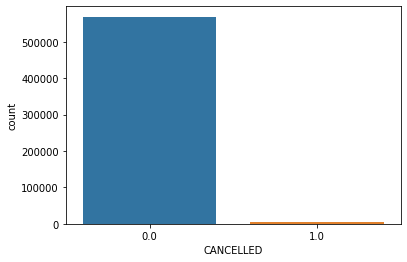

In [58]:
#Let's check how our target variable is distributed
sns.countplot(x = df['CANCELLED'])

From the above plot we can see that our data is highly imblanced and we have to use oversampling and undersampling methodologies before we can train the model. 
But before that's let's do some EDA and understand how our regressors affect the target variable.

In [59]:
#Starting by binning the distance column into four different subgroups 
bin_labels = ['1','2','3','4']
bins_level = [0,400,800,1200,10000] #Including a huge value to include all values above 1200
df1['Binned_Distance_Labels'] = pd.cut(df1['DISTANCE'], bins = bins_level, labels = bin_labels )

/Users/vardhanselvarajan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [60]:
df1.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME_BLK,CANCELLED,DISTANCE,Binned_Distance_Labels
0,1,6,MQ,13930,1393007,ORD,15370,1537002,TUL,1600-1659,0.0,585.0,2
1,1,6,MQ,12478,1247805,JFK,10693,1069302,BNA,1300-1359,0.0,765.0,2
2,1,6,MQ,11953,1195302,GNV,13303,1330303,MIA,0800-0859,0.0,294.0,1
3,1,6,MQ,11298,1129806,DFW,14842,1484202,SJT,0800-0859,0.0,229.0,1
4,1,6,MQ,14842,1484202,SJT,11298,1129806,DFW,1000-1059,0.0,229.0,1


So we have binned the distance column. I have used bin labels to be 1,2,3 and 4 just for the ease of use and it can be easily fit into the model without encoding

For reference, distances from 

(0 - 400] miles = 1

(400 - 800] miles = 2

(800 - 1200] miles = 3

(1200 - 10000] miles = 4

In [61]:
#Now we can drop the distance column
df1.drop(['DISTANCE'], axis = 1, inplace = True)

/Users/vardhanselvarajan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [84]:
# fig, ax = plt.subplots(1,2)
df2 = df1[['ORIGIN','CANCELLED']].loc[df1['CANCELLED'] == 1].groupby('ORIGIN').count().sort_values(by = 'CANCELLED', ascending = False).reset_index()
# sns.scatterplot(x = 'ORIGIN', y = )

,ORIGIN,CANCELLED,Overall_Count
0,CLT,565,NaN
1,ORD,387,NaN
2,DCA,224,NaN
3,DEN,193,NaN
4,LGA,138,NaN
...,...,...,...
274,GCC,1,NaN
275,PIH,1,NaN
276,SIT,1,NaN
277,FCA,1,NaN
